In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker
#from functional import *
import h5py

In [8]:
DIE = np.loadtxt("simopt_diis_energy.dat", dtype=None)
DIPE = np.loadtxt("simopt_diis_rmsdpe.dat", dtype=None)
DIPP = np.loadtxt("simopt_diis_rmsdpp.dat", dtype=None)

NDIE = np.loadtxt("simopt_simple_energy.dat", dtype=None)
NDIPE = np.loadtxt("simopt_simple_rmsdpe.dat", dtype=None)
NDIPP = np.loadtxt("simopt_simple_rmsdpp.dat", dtype=None)

In [9]:
DII = np.arange(1,16,1)
NDII = np.arange(1,246,1)


In [10]:
DIE -= DIE[-1]
NDIE -= NDIE[-1]

In [11]:
NDIE

array([ 4.03147662e-02,  1.08599286e-02,  9.22577873e-03,  8.26744359e-03,
        7.49571834e-03,  6.81672303e-03,  6.20165769e-03,  5.63960211e-03,
        5.12480375e-03,  4.65336900e-03,  4.22200263e-03,  3.82773891e-03,
        3.46778947e-03,  3.13953452e-03,  2.84050001e-03,  2.56836120e-03,
        2.32093632e-03,  2.09618571e-03,  1.89220688e-03,  1.70723060e-03,
        1.53961536e-03,  1.38784185e-03,  1.25050685e-03,  1.12631701e-03,
        1.01408246e-03,  9.12710538e-04,  8.21199416e-04,  7.38632010e-04,
        6.64169998e-04,  5.97048078e-04,  5.36568490e-04,  4.82095790e-04,
        4.33051918e-04,  3.88911554e-04,  3.49197758e-04,  3.13477903e-04,
        2.81359882e-04,  2.52488594e-04,  2.26542683e-04,  2.03231531e-04,
        1.82292486e-04,  1.63488315e-04,  1.46604860e-04,  1.31448900e-04,
        1.17846189e-04,  1.05639663e-04,  9.46878102e-05,  8.48631819e-05,
        7.60510381e-05,  6.81481185e-05,  6.10615251e-05,  5.47077081e-05,
        4.90115486e-05,  

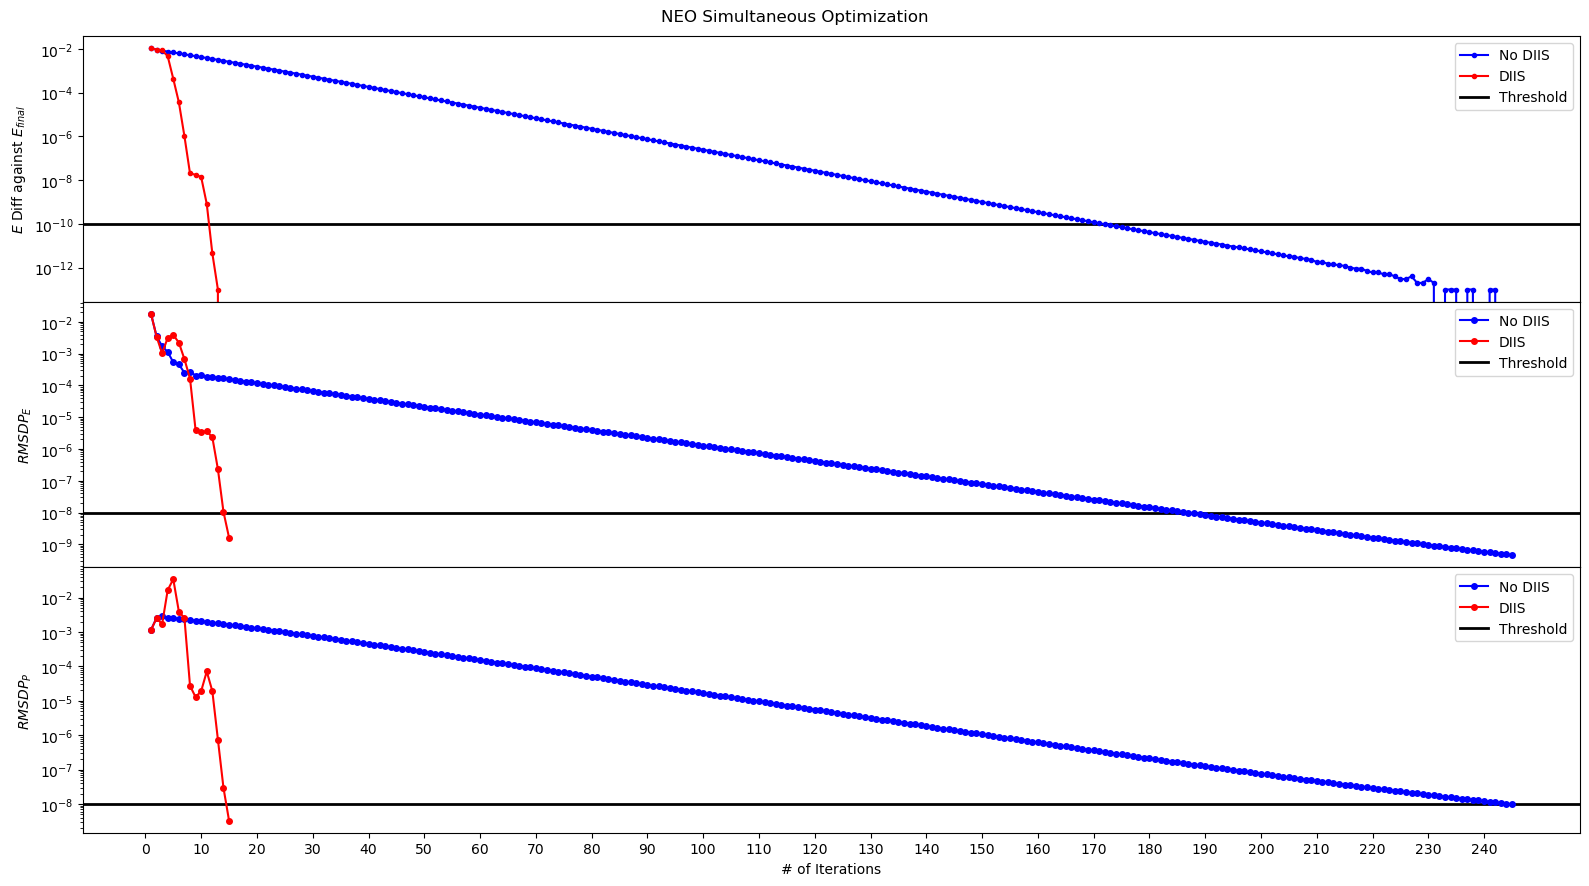

In [12]:
plt.style.use('default')
fig = plt.figure(figsize=(16,9))
gs = fig.add_gridspec(3, hspace=0)
ax = gs.subplots(sharex=True)
fig.suptitle('NEO Simultaneous Optimization')
ax[0].plot(NDII,NDIE[1:],'ob-',ms=3,label="No DIIS")
ax[0].plot(DII,DIE[1:],'or-',ms=3,label="DIIS")
ax[0].axhline(y=10**(-10),xmin=0,xmax=250,c="black",linewidth=2,zorder=0,label='Threshold')
ax[0].set_yscale("log")
ax[0].set_ylabel("$E$ Diff against $E_{final}$")
ax[0].legend()
#ax[0].axvline(x=16)

ax[1].plot(NDII,NDIPE[1:],'ob-',ms=4,label="No DIIS")
ax[1].plot(DII,DIPE[1:],'or-',ms=4,label="DIIS")
ax[1].axhline(y=10**(-8),xmin=0,xmax=250,c="black",linewidth=2,zorder=0,label='Threshold')
ax[1].set_yscale("log")
ax[1].set_ylabel("$RMSD P_E$")
ax[1].legend()
#ax[1].axvline(x=16)

ax[2].plot(NDII,NDIPP[1:],'ob-',ms=4,label="No DIIS")
ax[2].plot(DII,DIPP[1:],'or-',ms=4,label="DIIS")
ax[2].axhline(y=10**(-8),xmin=0,xmax=250,c="black",linewidth=2,zorder=0,label='Threshold')
ax[2].set_yscale("log")
ax[2].set_ylabel("$RMSD P_P$")
ax[2].set_xlabel("# of Iterations")
ax[2].set_xticks(np.arange(0, 247, step=10))
ax[2].legend()
#ax[2].axvline(x=16)

# Hide x labels and tick labels for all but bottom plot.
for axes in ax:
    axes.label_outer()
    

fig.set_facecolor('w')

plt.tight_layout()
plt.savefig('NEO_SMTOPT.png', dpi=300)
plt.show()



In [13]:
# Now Calculate the difference against the converged energy obtained from the subsystem SCF

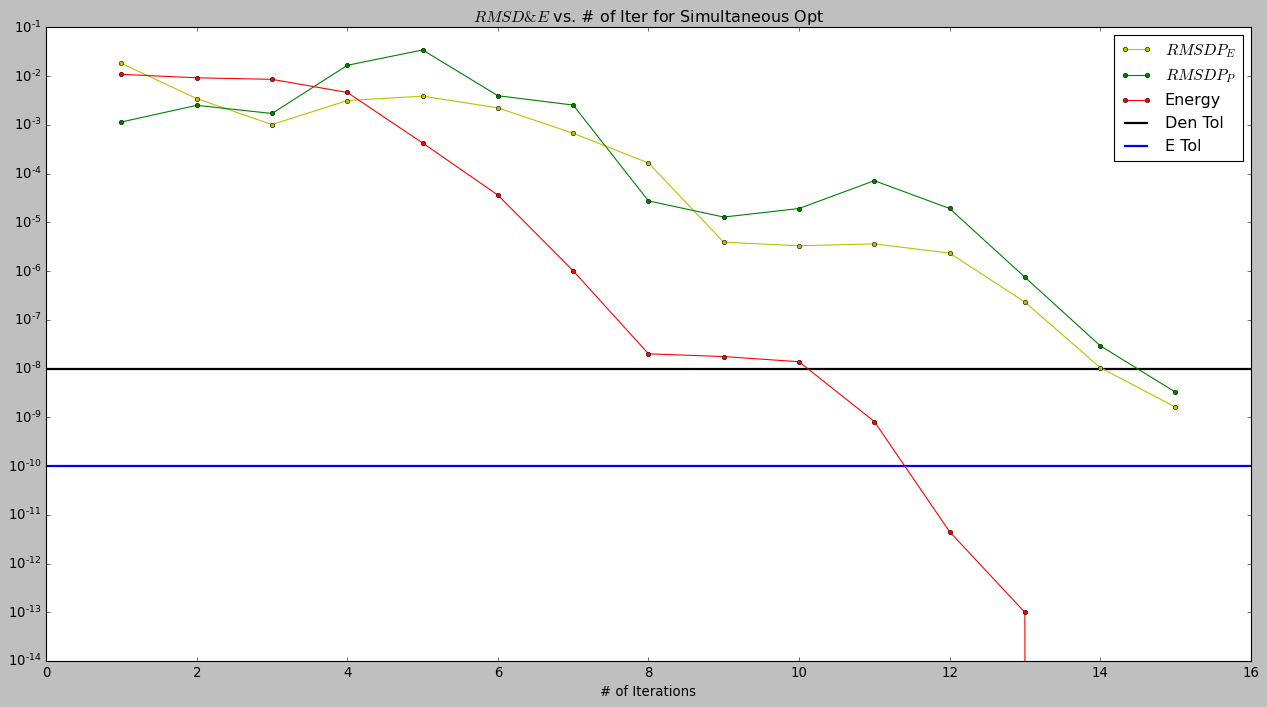

In [18]:
plt.style.use('classic')
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(DII,DIPE[1:],'oy-',ms=4,label="$RMSD P_E$")
plt.plot(DII,DIPP[1:],'og-',ms=4,label="$RMSD P_P$")
plt.plot(DII,DIE[1:],'or-',ms=4,label="Energy")
plt.axhline(y=10**(-8),xmin=0,xmax=250,c="black",linewidth=2,zorder=0,label='Den Tol')
plt.axhline(y=10**(-10),xmin=0,xmax=250,c="blue",linewidth=2,zorder=0,label='E Tol')
plt.yscale('log')
plt.legend()
plt.title('$RMSD&E$ vs. # of Iter for Simultaneous Opt')
plt.xlabel("# of Iterations")
plt.tight_layout()
plt.savefig('NEO_SMTOPT_PEPP.png', dpi=300)
plt.show()